#### **1. IMPORTING REQUIRED LIBRARIES**

In [1]:
import pandas as pd  # Data manipulation and analysis.
import matplotlib.pyplot as plt  # Data visualization.
import seaborn as sns  # Statistical data visualization.
import numpy as np  # Numerical computations and array manipulation.
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler  # Encoding and scaling features.
from sklearn.compose import make_column_transformer  # Custom column transformations for pipelines.
from scipy import stats  # Statistical functions like Z-score calculation.
from category_encoders import TargetEncoder  # Target encoding for categorical variables.
from sklearn.preprocessing import MinMaxScaler  # Scaling features to a specific range.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # Splitting data and hyperparameter tuning.
from sklearn.linear_model import LinearRegression, Ridge  # Linear regression models.
from sklearn.preprocessing import PolynomialFeatures  # Generating polynomial features.
from sklearn.tree import DecisionTreeRegressor  # Decision tree regression.
from sklearn.ensemble import RandomForestRegressor  # Ensemble method using random forests.
from sklearn.svm import SVR  # Support Vector Regression.
from sklearn.neighbors import KNeighborsRegressor  # K-nearest neighbors regression.
from sklearn.pipeline import make_pipeline  # Creating pipelines for streamlined modeling.
from sklearn.metrics import r2_score, mean_squared_error  # Model evaluation metrics.
from xgboost import XGBRegressor  # Gradient boosting model for regression.
from scipy.stats import uniform, randint  # Distributions for randomized hyperparameter search.

#### **2. IMPORTING THE SUPERMARKET DATASET**

In [2]:
# Loading the raw dataset
data = pd.read_csv('C:\\Users\\Kamlesh P Panchal\\Documents\\Infosys Internship\\train_og\\Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### **3. UNDERSTANDING THE DATA**

In [3]:
# Checking the dataset's dimensions

rows, columns = data.shape

print("Total number of rows:", rows)
print("Total number of columns:", columns)


Total number of rows: 8523
Total number of columns: 12


In [4]:
# Basic info and structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
# Data type of each column
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Basic statistics for numerical columns
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### **4. UNIQUE VALUES FROM CATEGORICAL COLUMNS**

This section reveals the unique values in categorical columns, highlighting the diversity of data within each category.

In [8]:
# Printing unique values to understand categorical feature diversity
categorical_cols = ['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 
                    'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"\nColumn '{col}':")
    print("Number of unique values:", data[col].nunique())
    print("Unique values:", data[col].unique())


Unique Values in Categorical Columns:

Column 'Item_Identifier':
Number of unique values: 1559
Unique values: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Column 'Item_Type':
Number of unique values: 16
Unique values: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Column 'Outlet_Identifier':
Number of unique values: 10
Unique values: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Column 'Item_Fat_Content':
Number of unique values: 5
Unique values: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Column 'Outlet_Size':
Number of unique values: 3
Unique values: ['Medium' nan 'High' 'Small']

Column 'Outlet_Location_Type':
Number of unique values: 3
Unique values: ['Tier 1' 'Tier 3' 'Tier 2']

Column 'Outlet_Type':
Number of unique values: 4
Unique values: ['Supermarket Ty

#### **5. HANDLING MISSING VALUES**

In [9]:
# checking for missing values
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [10]:
# Finding the mean of 'Item_Visibility' where it is greater than 0, as a placeholder for missing values
non_zero_mean = data.loc[data['Item_Visibility'] > 0, 'Item_Visibility'].mean()

In [11]:
# Filling missing 'Item_Weight' based on median of 'Item_Type'.
data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Type')['Item_Weight'].transform('median'))

In [12]:
# Filling missing 'Outlet_Size' with the mode of each 'Outlet_Type' group.
data['Outlet_Size'] = data['Outlet_Size'].fillna(data.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'))

In [13]:
#Feature Encoding
data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
# Checking for duplicates and removing them if any
data.drop_duplicates(inplace=True)

In [15]:
print(data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


#### **6. DATA VISUALIZATION**

#### **Univariate Analysis**

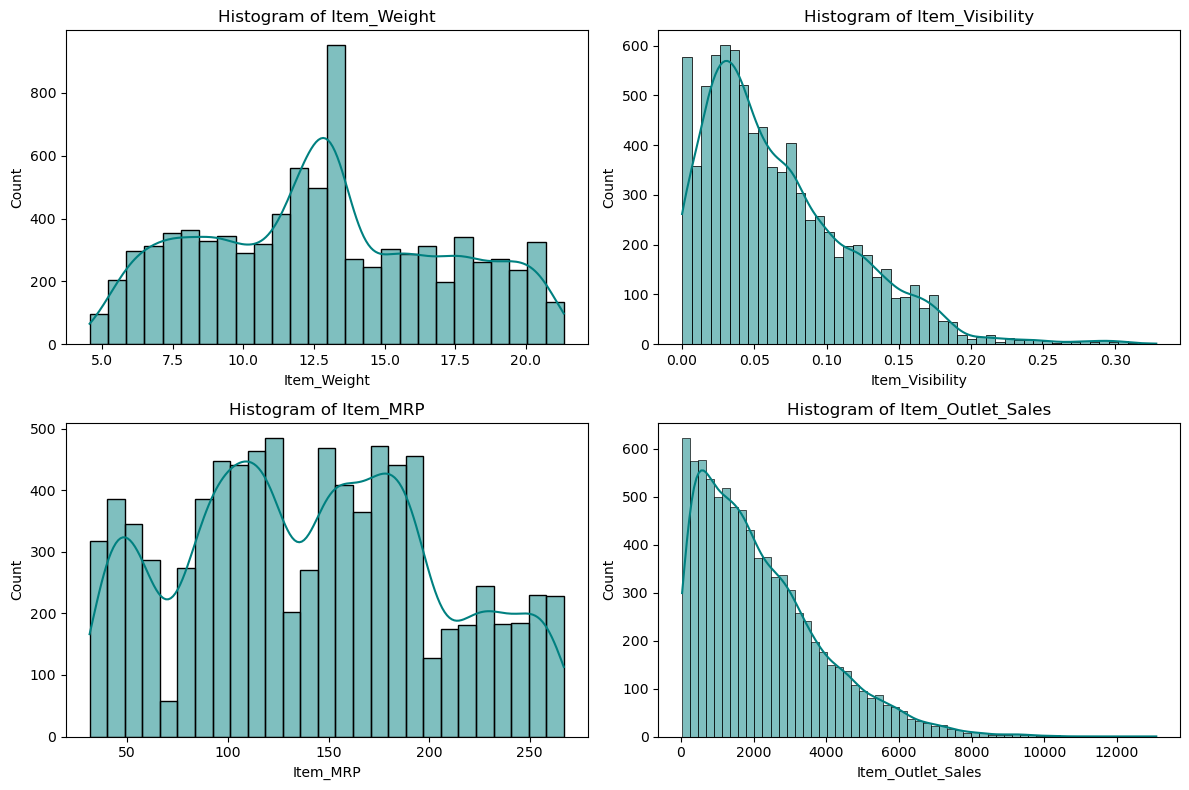

In [16]:
# Histograms of numerical features
# Shows distribution of each numerical feature to identify common or outlying values.

numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(2, 2, numerical_features.index(feature) + 1)
    sns.histplot(data[feature], kde=True, color='teal',edgecolor='black')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


#### **Bivariate Analysis**

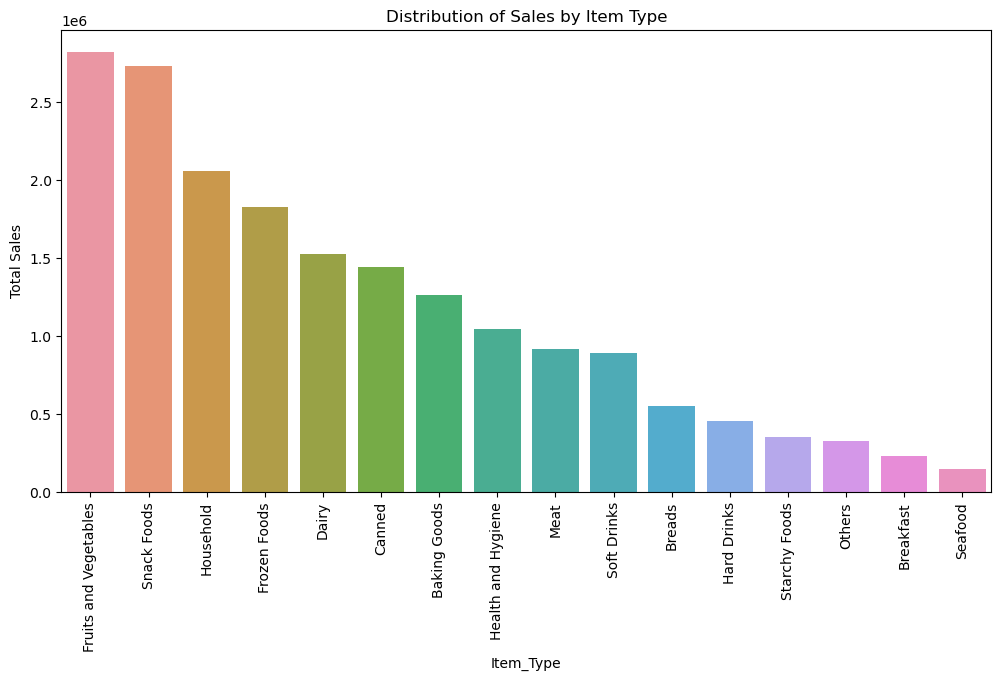

In [17]:
# Bar plot of total sales by Item Type
# Shows total sales for each item type, making it easy to see which items sell the most.

sorted_data = data.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values(by='Item_Outlet_Sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=sorted_data, ci=None)
plt.xticks(rotation=90)
plt.title('Distribution of Sales by Item Type')
plt.ylabel('Total Sales')
plt.show()

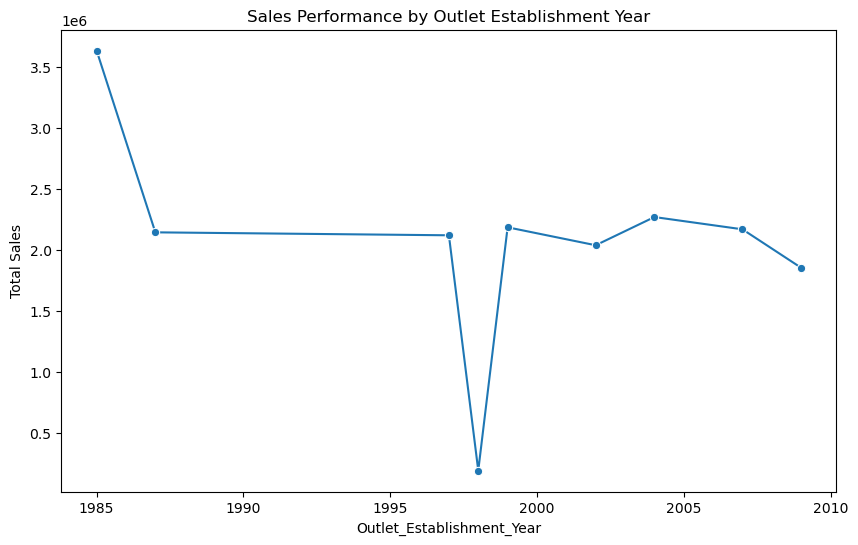

In [18]:
# Line plot for Sales Performance by Outlet Establishment Year
# Tracks total sales over the years to observe if older outlets have higher sales.

p_df_year_sales = data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=p_df_year_sales, marker='o')
plt.title('Sales Performance by Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.show()



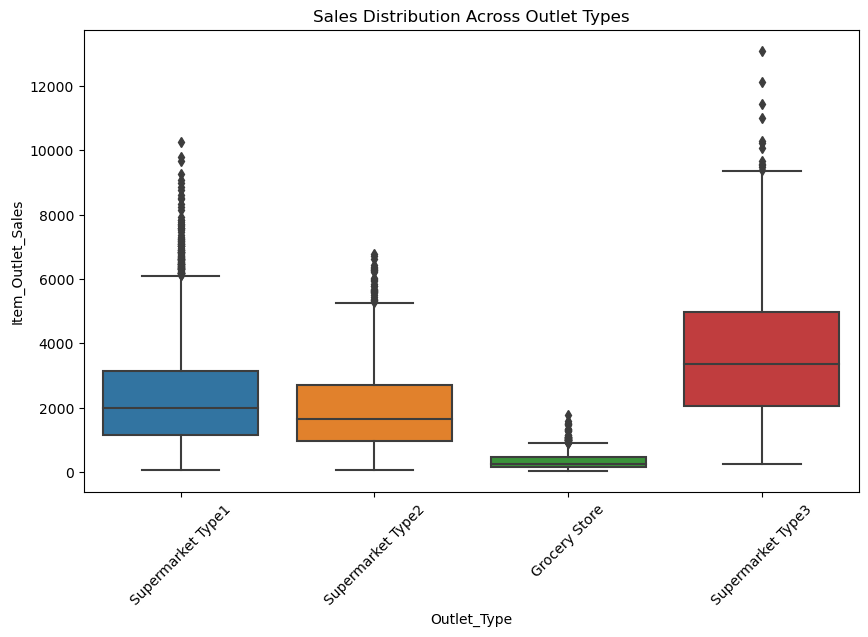

In [19]:
# Box plot of sales across Outlet Types
# Compares sales distribution by outlet type, showing which types generally have higher or lower sales.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data)
plt.title('Sales Distribution Across Outlet Types')
plt.xticks(rotation=45)
plt.show()


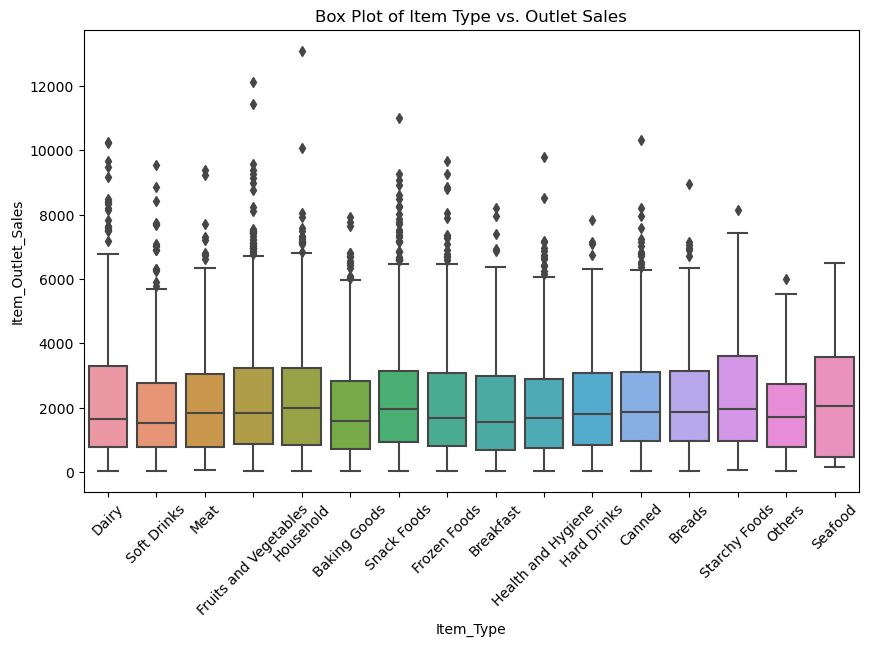

In [20]:
# Box plot of Item Type vs. Outlet Sales
# Compares sales for each item type, showing spread and identifying top-performing item types.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data)
plt.title('Box Plot of Item Type vs. Outlet Sales')
plt.xticks(rotation=45)
plt.show()


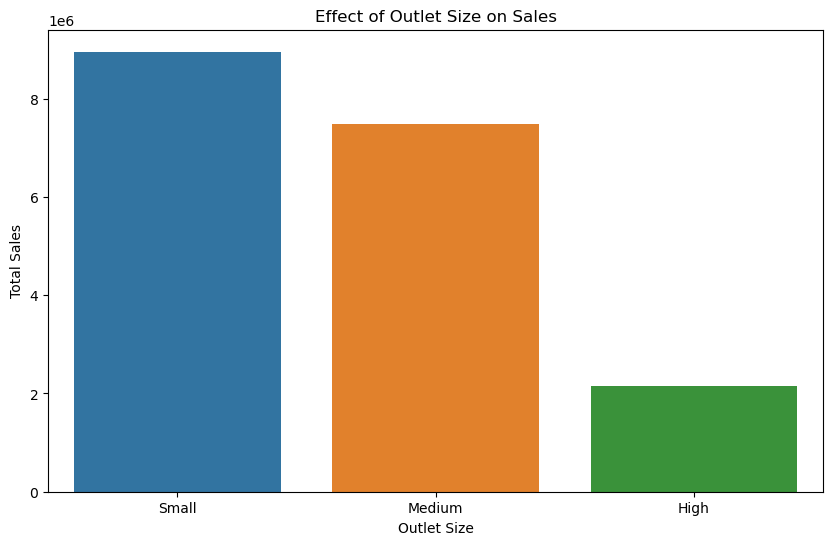

In [21]:
# Bar plot of sales by Outlet Size
# Shows total sales for each outlet size, helping to see if bigger outlets perform better.

sorted_data = data.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().reset_index().sort_values(by='Item_Outlet_Sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=sorted_data, ci=None)
plt.title('Effect of Outlet Size on Sales')
plt.ylabel('Total Sales')
plt.xlabel('Outlet Size')
plt.show()

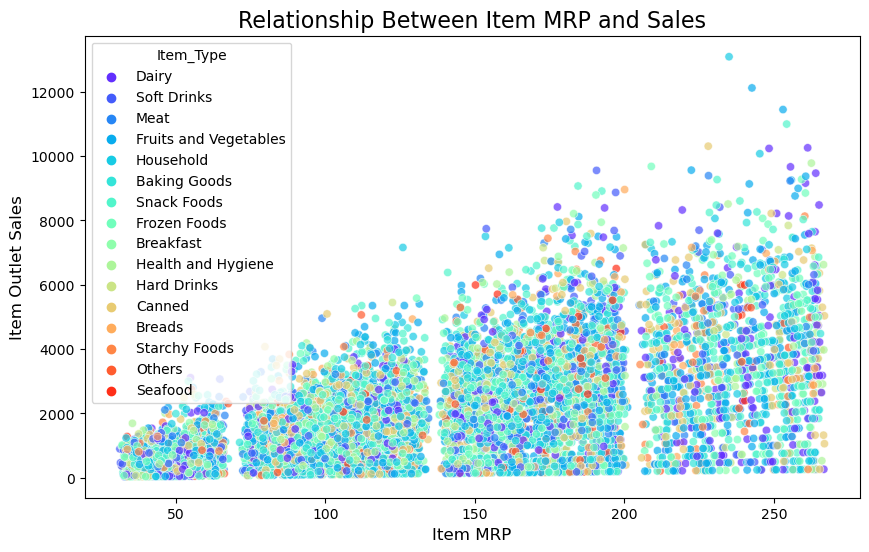

In [22]:
# Relationship Between Item MRP and Sales (Scatter Plot)
# Displays how item price (MRP) affects sales, with colors representing different item types.

plt.figure(figsize=(10,6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=data, hue='Item_Type', palette="rainbow", alpha=0.7)
plt.title('Relationship Between Item MRP and Sales', fontsize=16)
plt.xlabel('Item MRP', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)
plt.show()

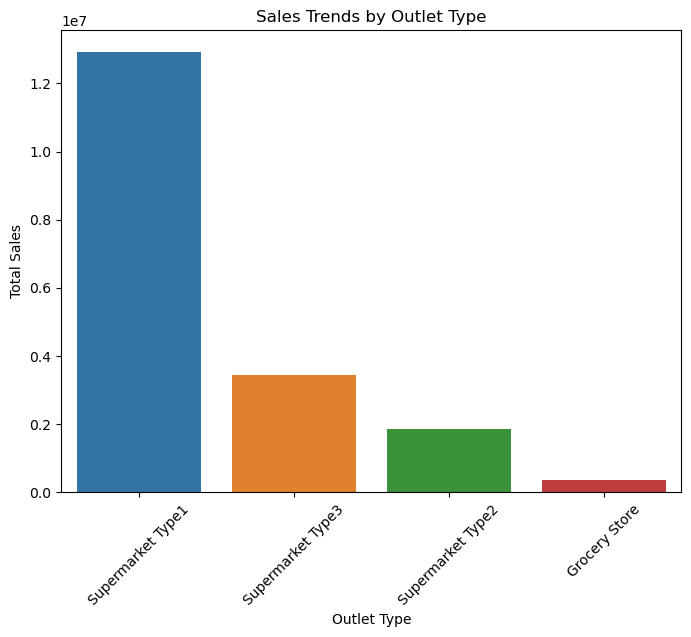

In [23]:
# Bar plot of sales by Outlet Type
# Shows total sales by outlet type, helping to identify which types have the highest sales.

p_df_outlet_sales = data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index()
p_df_outlet_sales = p_df_outlet_sales.sort_values(by='Item_Outlet_Sales', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=p_df_outlet_sales)
plt.title('Sales Trends by Outlet Type')
plt.ylabel('Total Sales')
plt.xlabel('Outlet Type')
plt.xticks(rotation=45)
plt.show()

#### **Multivariate Analysis**

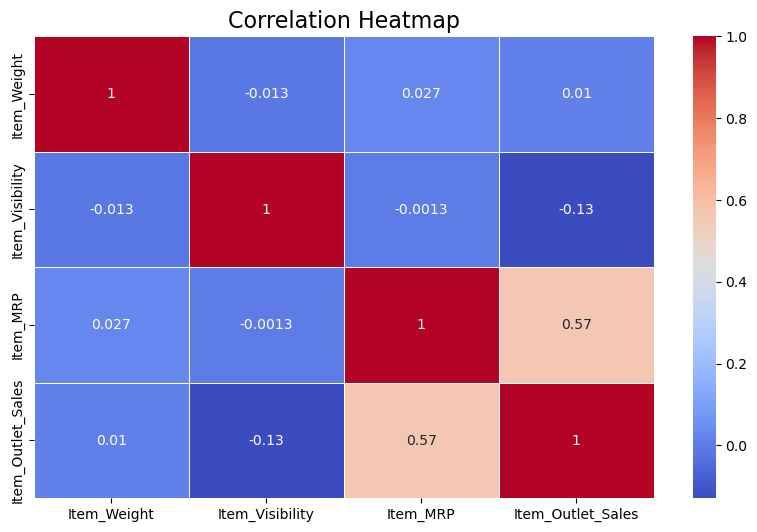

In [25]:
# Correlation Heatmap
# Shows correlations among numerical features, highlighting strong positive or negative relationships.

plt.figure(figsize=(10, 6))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#### **7. FEATURE DERIVATION**

In [26]:
# Creating a new column 'Outlet_age' to calculate the store's age based on its establishment year
data['Outlet_age'] = 2024 - data['Outlet_Establishment_Year']

# Deriving a new feature: 'sales_per_mrp' by dividing Item_Outlet_Sales by Item_MRP
# This step handles potential division by zero by replacing zero values with 1
data['sales_per_mrp'] = data['Item_Outlet_Sales'] / data['Item_MRP'].replace(0, 1)  # Replace 0 with 1 to avoid division by zero

print(data[['Outlet_Establishment_Year', 'Outlet_age','Item_Outlet_Sales', 'Item_MRP', 'sales_per_mrp']].head())

   Outlet_Establishment_Year  Outlet_age  Item_Outlet_Sales  Item_MRP  \
0                       1999          25          3735.1380  249.8092   
1                       2009          15           443.4228   48.2692   
2                       1999          25          2097.2700  141.6180   
3                       1998          26           732.3800  182.0950   
4                       1987          37           994.7052   53.8614   

   sales_per_mrp  
0      14.951963  
1       9.186454  
2      14.809346  
3       4.021967  
4      18.467868  


In [27]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_age', 'sales_per_mrp'],
      dtype='object')

#### **8. CATEGORICAL VARIABLE ENCODING**

In [28]:
# Columns with high cardinality
high_cardinality_columns = ['Item_Identifier', 'Outlet_Identifier']
target_encoder = TargetEncoder(cols=high_cardinality_columns)
data = target_encoder.fit_transform(data, data['Item_Outlet_Sales'])

# Identifying categorical and numerical columns for encoding and scaling
nominal_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
ordinal_columns = ['Outlet_Size']
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

print("Nominal Columns: ", nominal_columns)
print("Ordinal Columns: ", ordinal_columns)
print("Numerical Columns: ", numerical_columns)

Nominal Columns:  ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
Ordinal Columns:  ['Outlet_Size']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP']


In [29]:
# Mapping for ordinal encoding of the 'Outlet_Size' column
Outlet_Size_mapping = ['Small', 'Medium', 'High'] 

In [30]:
ohe = OneHotEncoder(drop='first', sparse_output=False)  # For nominal columns
ode = OrdinalEncoder(categories=[Outlet_Size_mapping])  # For ordinal column
scaler = StandardScaler()  # For numeric columns

In [31]:
# Column transformer to apply different transformations to different column types
ct = make_column_transformer(
    (ohe, nominal_columns),  # Nominal columns
    (ode, ordinal_columns),  # Ordinal column
    (scaler, numerical_columns),  # Numeric columns
    remainder='passthrough'
)

ct.set_output(transform='pandas')  # Ensures the output is a DataFrame
df_encoded = ct.fit_transform(data)

In [32]:
# Cleaning up column names to remove the transformer prefix
df_encoded.columns = [col.replace("onehotencoder__", "")
                             .replace("ordinalencoder__", "")
                             .replace("standardscaler__", "")
                             .replace("remainder__","")
                             for col in df_encoded.columns]

print("Encoded Columns:\n", df_encoded.columns.tolist())

Encoded Columns:
 ['Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3', 'Outlet_Size', 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_age', 'sales_per_mrp']


In [33]:
df_encoded.columns

Index(['Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Size', 'Item_Weight',
       'Item_Visibility', 'Item_MRP', 'Item_Identifier', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_age',
       'sales_per_mrp'],
      dtype='object')

In [34]:
df_encoded.head()

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Size,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age,sales_per_mrp
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.828408,-0.970732,1.747454,2879.598286,2348.354635,1999,3735.1380,25,14.951963
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-1.625364,-0.908111,-1.489023,1920.354050,1995.498739,2009,443.4228,15,9.186454
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.105037,-0.956917,0.010040,2030.685308,2348.354635,1999,2097.2700,25,14.809346
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.505873,-1.281758,0.660050,2347.410648,339.351662,1998,732.3800,26,4.021967
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,-0.915649,-1.281758,-1.399220,1879.152033,2298.995256,1987,994.7052,37,18.467868


In [35]:
# Displaying the shape of the encoded DataFrame
rows, columns = df_encoded.shape
print("Total number of rows after encoding:", rows)
print("Total number of columns after encoding:", columns)

Total number of rows after encoding: 8523
Total number of columns after encoding: 31


#### **9. OUTLIER TREATMENT**

Item_Weight: 0 outliers detected.
Item_Visibility: 146 outliers detected.
Item_MRP: 0 outliers detected.
Item_Outlet_Sales: 197 outliers detected.


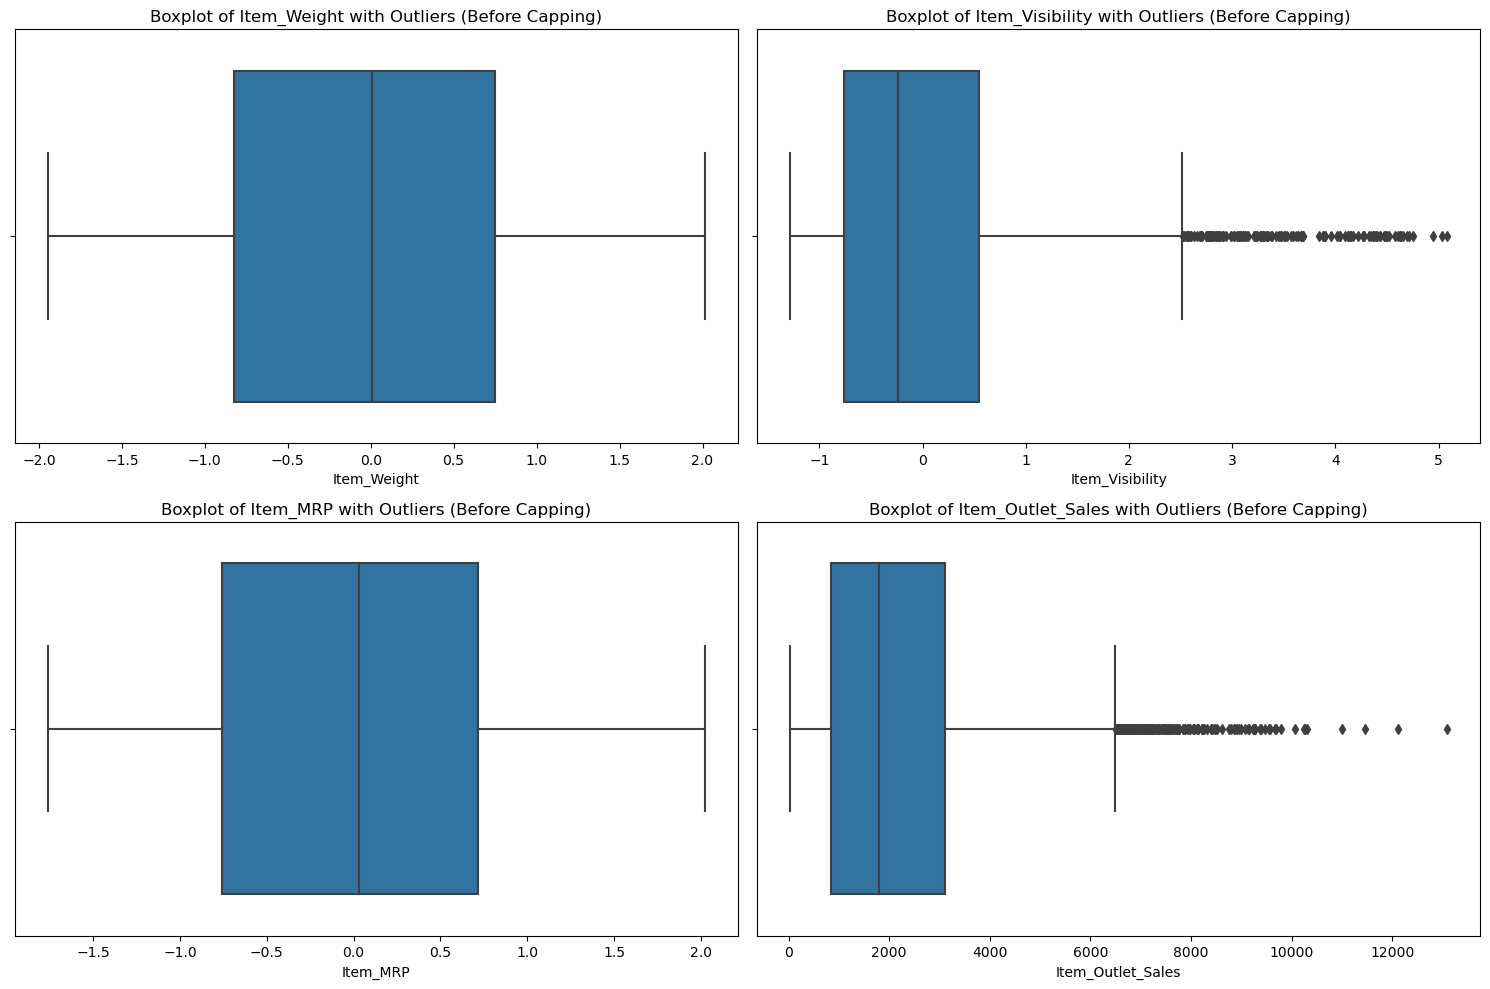

In [36]:
# List of continuous features for outlier analysis
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Defining Z-score threshold for outlier detection
z_threshold = 2.5 # as 3 results with 0 outliers & 2 with many so fixed T as 2.5

# Dictionary to store detected outliers
outliers_dict = {}

# Step 1: Calculating Z-scores and identifying outliers
for col in continuous_columns:
    df_encoded[col + '_zscore'] = np.abs((df_encoded[col] - df_encoded[col].mean()) / df_encoded[col].std())  # Calculates Z-scores
    outliers_dict[col] = df_encoded[df_encoded[col + '_zscore'] > z_threshold]  # Store outliers
    print(f"{col}: {outliers_dict[col].shape[0]} outliers detected.")

plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_encoded[col])  
    plt.title(f'Boxplot of {col} with Outliers (Before Capping)')
plt.tight_layout()
plt.show()

Item_Weight: 0 outliers capped.
Item_Visibility: 0 outliers capped.
Item_MRP: 0 outliers capped.
Item_Outlet_Sales: 0 outliers capped.


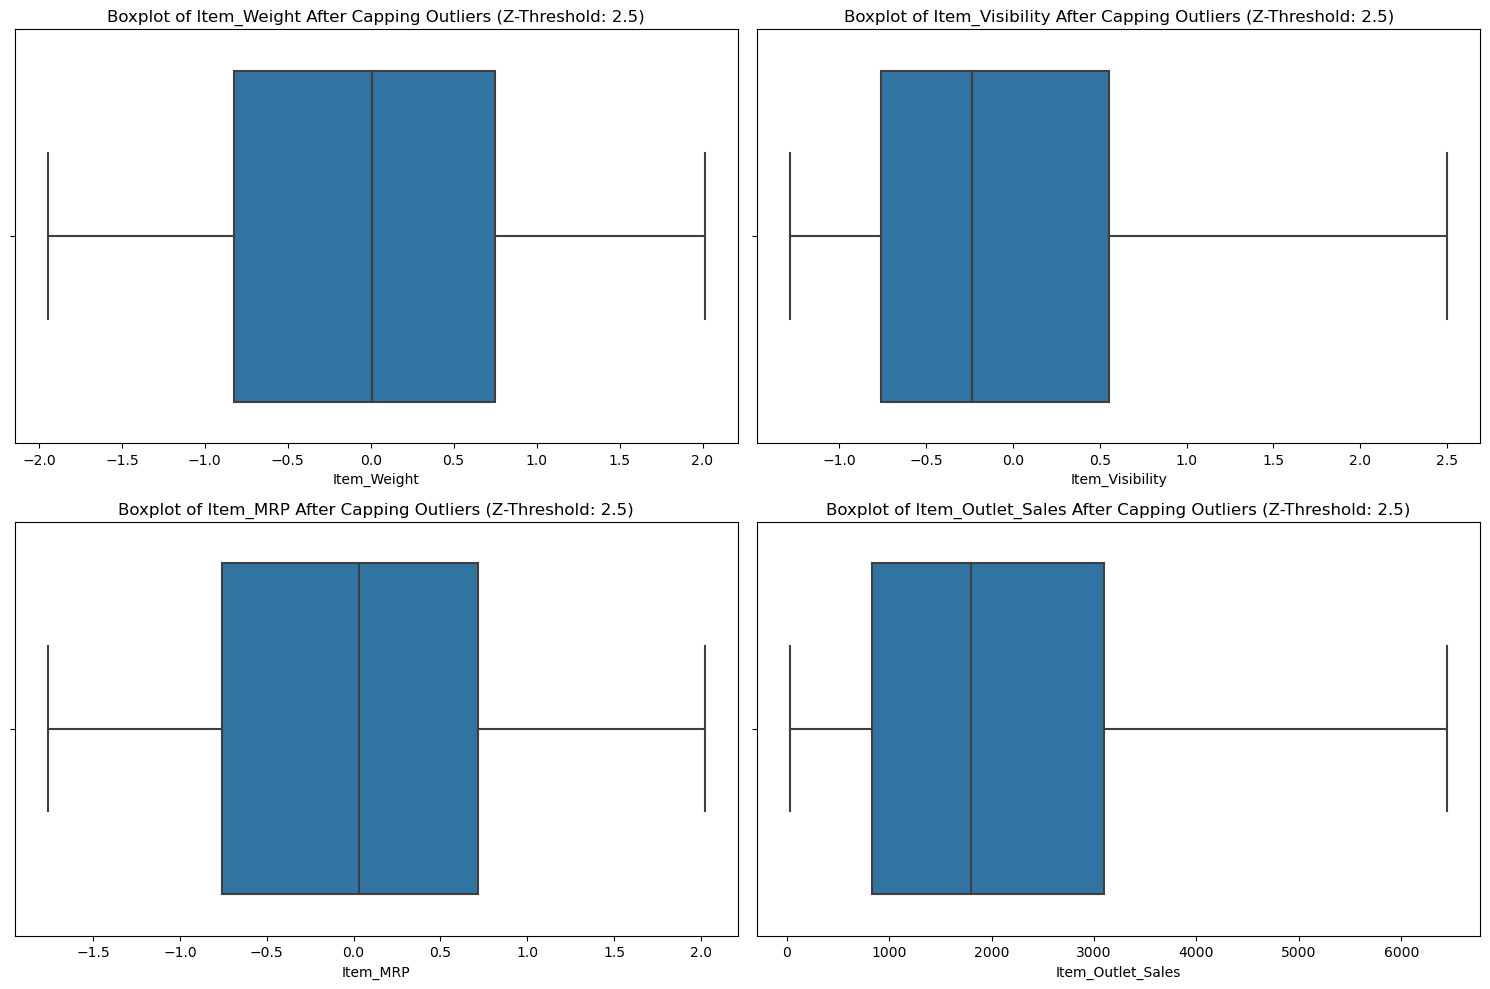

In [37]:
for col in continuous_columns:
    # Calculating the upper and lower bounds for capping
    upper_bound = df_encoded[col].mean() + z_threshold * df_encoded[col].std()
    lower_bound = df_encoded[col].mean() - z_threshold * df_encoded[col].std()

    # Cap values above the upper bound and below the lower bound
    df_encoded[col] = np.where(df_encoded[col] > upper_bound, upper_bound,
                               np.where(df_encoded[col] < lower_bound, lower_bound, df_encoded[col]))

    # Checking how many values were capped
    capped_outliers = df_encoded[(df_encoded[col] > upper_bound) | (df_encoded[col] < lower_bound)].shape[0]
    print(f"{col}: {capped_outliers} outliers capped.")

plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_encoded[col])  # Boxplot to visualize data after capping
    plt.title(f'Boxplot of {col} After Capping Outliers (Z-Threshold: {z_threshold})')
plt.tight_layout()
plt.show()

#### **10. FEATURE SCALING**

In [38]:
min_max_scaler = MinMaxScaler()  # Initializing Min-Max Scaler
df_encoded[['Item_MRP', 'Item_Visibility']] = min_max_scaler.fit_transform(df_encoded[['Item_MRP', 'Item_Visibility']])

# Displaying the scaled data
df_encoded[['Item_MRP', 'Item_Visibility']].head()  # Checking the scaled values for 'Item_MRP' and 'Item_Visibility'


,Item_MRP,Item_Visibility
0,0.927507,0.082240
1,0.072068,0.098799
2,0.468288,0.085893
3,0.640093,0.000000
4,0.095805,0.000000


### **11. STORING OUR NUMERICAL DATASET**

In [39]:
df_encoded.to_csv('C:\\Users\\Kamlesh P Panchal\\Documents\\Infosys Internship\\final_data.csv', index=False)

#### **12. VISUALIZING THE DISTRIBUTION OF 'Item_Outlet_Sales' AND APPLYING LOG TRANSFORMATION**

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

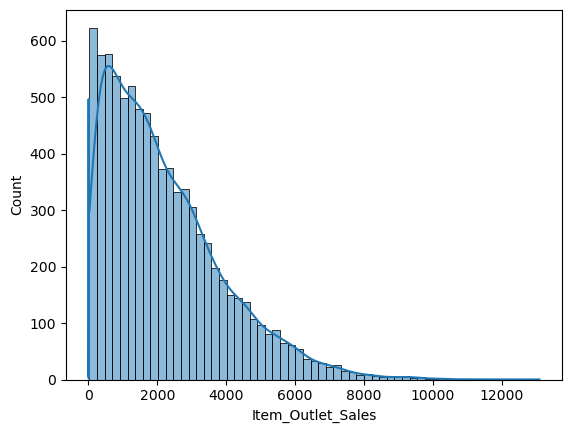

In [40]:
# Investigating the distribution of 'Item_Outlet_Sales'
sns.histplot(data['Item_Outlet_Sales'], kde=True)  # Plotting the histogram with KDE for 'Item_Outlet_Sales'

# Applying log transformation to reduce skewness in the 'Item_Outlet_Sales' distribution
data['Item_Outlet_Sales_Log'] = np.log1p(data['Item_Outlet_Sales'])  # log1p for log(1 + x)

# Checking the distribution after applying the log transformation
sns.histplot(data['Item_Outlet_Sales_Log'], kde=True)  # Plotting the histogram with KDE for log-transformed data


### **13. MODELING - TRAINING & TESTING**

In [41]:
# loading the dataset
df = pd.read_csv('C:\\Users\\Kamlesh P Panchal\\Documents\\Infosys Internship\\final_data.csv')
df

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Item_Identifier,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age,sales_per_mrp,Item_Weight_zscore,Item_Visibility_zscore,Item_MRP_zscore,Item_Outlet_Sales_zscore
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2879.598286,2348.354635,1999,3735.1380,25,14.951963,0.828359,0.970675,1.747351,0.910548
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1920.354050,1995.498739,2009,443.4228,15,9.186454,1.625269,0.908058,1.488936,1.018381
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2030.685308,2348.354635,1999,2097.2700,25,14.809346,1.104972,0.956861,0.010040,0.049235
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2347.410648,339.351662,1998,732.3800,26,4.021967,1.505785,1.281683,0.660011,0.849053
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1879.152033,2298.995256,1987,994.7052,37,18.467868,0.915595,1.281683,1.399138,0.695332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2424.628001,2298.995256,1987,2778.3834,37,12.951520,1.402464,0.181183,1.180714,0.349894
8519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2271.350452,2192.384798,2002,549.2850,22,5.078589,1.045270,0.371132,0.527270,0.956346
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1991.431370,2438.841866,2004,1193.1136,20,14.016447,0.521856,0.599749,0.897155,0.579066
8521,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2158.829654,1995.498739,2009,1845.5976,15,17.895281,1.321123,1.532790,0.607941,0.196713


In [42]:
# Separating features (X) and target variable (y)
X = df.drop('Item_Outlet_Sales', axis=1)  # Features
y = df['Item_Outlet_Sales']  # Target

In [43]:
# Splitting the data into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

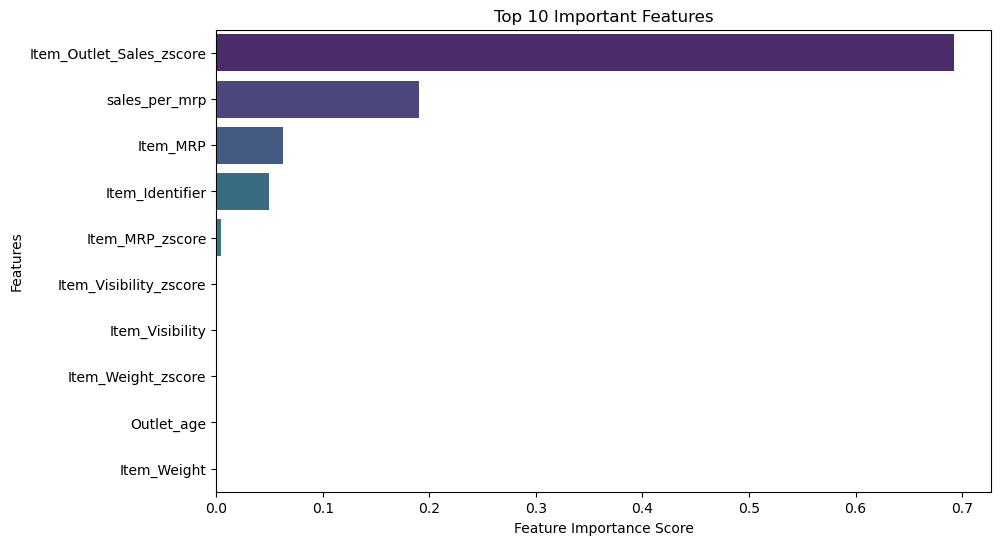

In [44]:
feature_selector = RandomForestRegressor(n_estimators=100, random_state=42)
feature_selector.fit(x_train, y_train)

# Getting feature importances
feature_importances = pd.Series(feature_selector.feature_importances_, index=x_train.columns)

# Selecting and plotting the top 10 features
top_features = feature_importances.nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

# Updating x_train and x_test to use only the top 10 features
x_train, x_test = x_train[top_features.index], x_test[top_features.index]

### **15. MODEL EVALUATION**

In [46]:
# Defining multiple regression models for evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Decision Tree": DecisionTreeRegressor(random_state=2),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": make_pipeline(StandardScaler(), SVR(kernel='linear')),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "XGBoost Regression": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, verbosity=0),
}

# Setting up to perform repeated train-test splits for model stability
n_runs = 10
results = {}

# Loop for each model evaluation
for model_name, model in models.items():
    test_r2_scores = []
    
    # Repeating train-test split for stability in R² scores
    for i in range(n_runs):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        
        model.fit(x_train, y_train)
        y_test_pred = model.predict(x_test)
       
        test_r2 = r2_score(y_test, y_test_pred)
        test_r2_scores.append(test_r2)
    
    mean_r2 = np.mean(test_r2_scores)
    std_dev_r2 = np.std(test_r2_scores)
    
    results[model_name] = {
        "Mean Test R2": mean_r2,
        "Standard Deviation of Test R2": std_dev_r2
    }
    
    print(f"\n--- {model_name} ---")
    print(f"Mean Test R2: {results[model_name]['Mean Test R2']}")
    print(f"Standard Deviation of Test R2: {results[model_name]['Standard Deviation of Test R2']}")




--- Linear Regression ---
Mean Test R2: 0.9343276780812161
Standard Deviation of Test R2: 0.0055760833448020965

--- Polynomial Regression ---
Mean Test R2: 0.9975702413088555
Standard Deviation of Test R2: 0.00019893979197953797

--- Decision Tree ---
Mean Test R2: 0.997352197801993
Standard Deviation of Test R2: 0.0022343746471843906

--- Random Forest ---
Mean Test R2: 0.9990982054098388
Standard Deviation of Test R2: 0.0004853555945008092

--- Support Vector Regression ---
Mean Test R2: 0.9301447890085051
Standard Deviation of Test R2: 0.00624791059580322

--- KNN Regression ---
Mean Test R2: 0.8565845659644434
Standard Deviation of Test R2: 0.005161761487779987

--- XGBoost Regression ---
Mean Test R2: 0.9976972770545272
Standard Deviation of Test R2: 0.00028353415741490766


In [47]:
# Find the model with the highest Mean Test R² score but doesn't exceed 1.0
best_model_name = max(
    (name for name in results if results[name]['Mean Test R2'] < 1.0),
    key=lambda x: results[x]['Mean Test R2']
)

best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with Mean Test R2: {results[best_model_name]['Mean Test R2']} and Standard Deviation of Test R2: {results[best_model_name]['Standard Deviation of Test R2']}")


Best Model: Random Forest with Mean Test R2: 0.9990982054098388 and Standard Deviation of Test R2: 0.0004853555945008092


### **16. HYPERPARAMETER TUNING**

In [48]:
# Setting up hyperparameter tuning for Random Forest and XGBoost using GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

In [49]:
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [50]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='r2', cv=3, n_jobs=-1)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='r2', cv=3, n_jobs=-1)

In [51]:
# Applying GridSearchCV for optimal hyperparameter tuning on Random Forest and XGBoost
grid_search_rf.fit(x_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

grid_search_xgb.fit(x_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_

In [52]:
y_pred_rf = best_rf_model.predict(x_test)
y_pred_xgb = best_xgb_model.predict(x_test)

In [53]:

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n--- Evaluation on Test Set ---")
print(f"Random Forest Best Model - Mean Squared Error: {mse_rf}, R²: {r2_rf}")
print(f"XGBoost Best Model - Mean Squared Error: {mse_xgb}, R²: {r2_xgb}")


# Printing the best hyperparameters for both models
print("\n--- Best Hyperparameters ---")
print(f"Best Hyperparameters for Random Forest: {best_rf_params}")
print(f"Best Hyperparameters for XGBoost: {best_xgb_params}")


--- Evaluation on Test Set ---
Random Forest Best Model - Mean Squared Error: 604.6769504971802, R²: 0.9997715637450673
XGBoost Best Model - Mean Squared Error: 904.2597095407439, R²: 0.9996583866784334

--- Best Hyperparameters ---
Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


#### **FINALIZED MODEL - RANDOM FOREST REGRESSOR**

In [54]:
# Re-training the Random Forest with the best hyperparameters on the full training set
final_rf_model = RandomForestRegressor(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    random_state=42
)

# Fitting the final model on the full training data
final_rf_model.fit(x_train, y_train)

# Evaluating the final model on the test set
y_final_pred_rf = final_rf_model.predict(x_test)
mse_final_rf = mean_squared_error(y_test, y_final_pred_rf)
r2_final_rf = r2_score(y_test, y_final_pred_rf)

print("\n--- Final Random Forest Model Evaluation ---")
print(f"Mean Squared Error: {mse_final_rf}")
print(f"R² Score: {r2_final_rf}")



--- Final Random Forest Model Evaluation ---
Mean Squared Error: 604.6769504971802
R² Score: 0.9997715637450673


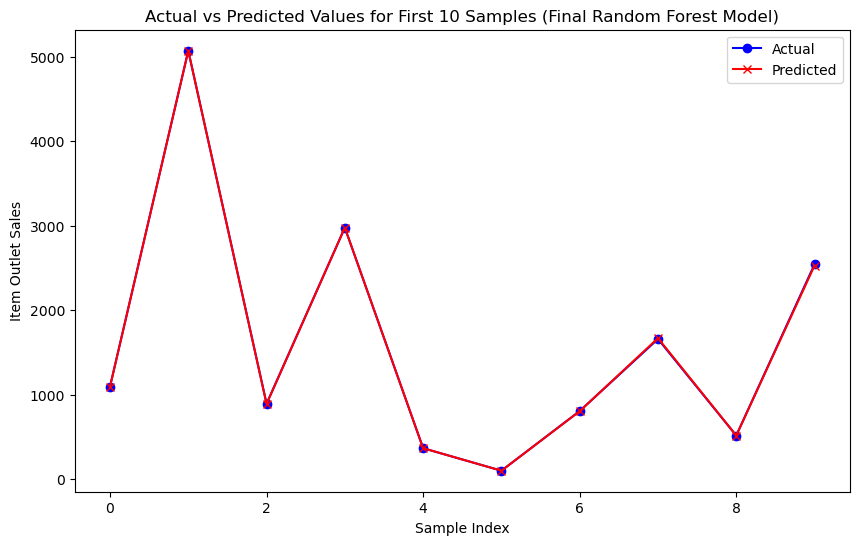

In [55]:
# Getting the first 10 samples from the test set
sample_indices = range(10)
y_actual = y_test.iloc[sample_indices].values
y_pred_best_rf = final_rf_model.predict(x_test.iloc[sample_indices])

# Plotting Actual vs Predicted values for the first 10 samples
plt.figure(figsize=(10, 6))
plt.plot(sample_indices, y_actual, marker='o', color='blue', label='Actual')
plt.plot(sample_indices, y_pred_best_rf, marker='x', color='red', label='Predicted')
plt.xlabel("Sample Index")
plt.ylabel("Item Outlet Sales")
plt.title("Actual vs Predicted Values for First 10 Samples (Final Random Forest Model)")
plt.legend()
plt.show()
